In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "countries-of-the-world"

In [2]:
## Read the data
countries = read.csv("/kaggle/input/countries-of-the-world/countries of the world.csv")

## Examine the data and the data types

In [3]:
head(countries)
summary(countries)

,Country,Region,Population,Area..sq..mi..,Pop..Density..per.sq..mi..,Coastline..coast.area.ratio.,Net.migration,Infant.mortality..per.1000.births.,GDP....per.capita.,Literacy....,Phones..per.1000.,Arable....,Crops....,Other....,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
2,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
3,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
4,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",,,
5,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,
6,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900,"42,0","7,8","2,41","0,24","97,35",,"45,11","24,2","0,096","0,658","0,246"


   Country             Region            Population        Area..sq..mi..    
 Length:227         Length:227         Min.   :7.026e+03   Min.   :       2  
 Class :character   Class :character   1st Qu.:4.376e+05   1st Qu.:    4648  
 Mode  :character   Mode  :character   Median :4.787e+06   Median :   86600  
                                       Mean   :2.874e+07   Mean   :  598227  
                                       3rd Qu.:1.750e+07   3rd Qu.:  441811  
                                       Max.   :1.314e+09   Max.   :17075200  
                                                                             
 Pop..Density..per.sq..mi.. Coastline..coast.area.ratio. Net.migration     
 Length:227                 Length:227                   Length:227        
 Class :character           Class :character             Class :character  
 Mode  :character           Mode  :character             Mode  :character  
                                                                        

In [4]:
sapply(countries, FUN = is.numeric)
sapply(countries, FUN = typeof)

Country                             Region 
                             FALSE                              FALSE 
                        Population                     Area..sq..mi.. 
                              TRUE                               TRUE 
        Pop..Density..per.sq..mi..       Coastline..coast.area.ratio. 
                             FALSE                              FALSE 
                     Net.migration Infant.mortality..per.1000.births. 
                             FALSE                              FALSE 
                GDP....per.capita.                       Literacy.... 
                              TRUE                              FALSE 
                 Phones..per.1000.                         Arable.... 
                             FALSE                              FALSE 
                         Crops....                          Other.... 
                             FALSE                              FALSE 
                           Climate                          Birthrate 
                             FALSE                              FALSE 
                         Deathrate                        Agriculture 
                             FALSE                              FALSE 
                          Industry                            Service 
                             FALSE                              FALSE

Country                             Region 
                       "character"                        "character" 
                        Population                     Area..sq..mi.. 
                         "integer"                          "integer" 
        Pop..Density..per.sq..mi..       Coastline..coast.area.ratio. 
                       "character"                        "character" 
                     Net.migration Infant.mortality..per.1000.births. 
                       "character"                        "character" 
                GDP....per.capita.                       Literacy.... 
                         "integer"                        "character" 
                 Phones..per.1000.                         Arable.... 
                       "character"                        "character" 
                         Crops....                          Other.... 
                       "character"                        "character" 
                           Climate                          Birthrate 
                       "character"                        "character" 
                         Deathrate                        Agriculture 
                       "character"                        "character" 
                          Industry                            Service 
                       "character"                        "character"

We immediately see some issues

* The column names are too complicated and need to be cleaned 
* The string variables contain trailing white spaces that need to be cleared, if not it will be hard for us to search certain strings of interests
* Columns that should be numeric are not, due to the presence of a comma in the entries

## Dataset cleaning 

### Factorial data (strings)

In [5]:
## Dataset cleaning 
head(countries$Country)
head(countries$Region)

[1] "Afghanistan "    "Albania "        "Algeria "        "American Samoa "
[5] "Andorra "        "Angola "

[1] "ASIA (EX. NEAR EAST)         "       "EASTERN EUROPE                     "
[3] "NORTHERN AFRICA                    " "OCEANIA                            "
[5] "WESTERN EUROPE                     " "SUB-SAHARAN AFRICA                 "

In [6]:
## Use built in function to trim white space 
countries$Country = trimws(countries$Country, which = 'both')

## Check 
head(countries$Country)

[1] "Afghanistan"    "Albania"        "Algeria"        "American Samoa"
[5] "Andorra"        "Angola"

In [7]:
## Repeat for region 
countries$Region = trimws(countries$Region, which = 'both')

## Check
head(countries$Region)

[1] "ASIA (EX. NEAR EAST)" "EASTERN EUROPE"       "NORTHERN AFRICA"     
[4] "OCEANIA"              "WESTERN EUROPE"       "SUB-SAHARAN AFRICA"

### Change column names 

In [8]:
colnames(countries)


[1] "Country"                            "Region"                            
 [3] "Population"                         "Area..sq..mi.."                    
 [5] "Pop..Density..per.sq..mi.."         "Coastline..coast.area.ratio."      
 [7] "Net.migration"                      "Infant.mortality..per.1000.births."
 [9] "GDP....per.capita."                 "Literacy...."                      
[11] "Phones..per.1000."                  "Arable...."                        
[13] "Crops...."                          "Other...."                         
[15] "Climate"                            "Birthrate"                         
[17] "Deathrate"                          "Agriculture"                       
[19] "Industry"                           "Service"

In [9]:
library(stringr)

In [10]:
colnames <- str_replace_all(colnames(countries), '[^[:alnum:]]', " ")
print(colnames)

 [1] "Country"                            "Region"                            
 [3] "Population"                         "Area  sq  mi  "                    
 [5] "Pop  Density  per sq  mi  "         "Coastline  coast area ratio "      
 [7] "Net migration"                      "Infant mortality  per 1000 births "
 [9] "GDP    per capita "                 "Literacy    "                      
[11] "Phones  per 1000 "                  "Arable    "                        
[13] "Crops    "                          "Other    "                         
[15] "Climate"                            "Birthrate"                         
[17] "Deathrate"                          "Agriculture"                       
[19] "Industry"                           "Service"                           


In [11]:
## Trim the trailing white space 
colnames <- trimws(colnames)
print(colnames)

## Further simplify, keeping only the first word for most of the columns, except for a few such as net migration and pop density 
final_colnames <- sapply(colnames, function(colnames) {
    words <- unlist(strsplit(colnames, " "))
    if (words[1] %in% c("Pop", "Infant", "Net")) { 
    return(paste0(words[1], "_", words[2])) ## for the special cases with two words, use a "_" in between
  } else {
    return(words[1])
  }})

## Check
names(final_colnames) <- NULL
print(final_colnames)

 [1] "Country"                           "Region"                           
 [3] "Population"                        "Area  sq  mi"                     
 [5] "Pop  Density  per sq  mi"          "Coastline  coast area ratio"      
 [7] "Net migration"                     "Infant mortality  per 1000 births"
 [9] "GDP    per capita"                 "Literacy"                         
[11] "Phones  per 1000"                  "Arable"                           
[13] "Crops"                             "Other"                            
[15] "Climate"                           "Birthrate"                        
[17] "Deathrate"                         "Agriculture"                      
[19] "Industry"                          "Service"                          
 [1] "Country"          "Region"           "Population"       "Area"            
 [5] "Pop_"             "Coastline"        "Net_migration"    "Infant_mortality"
 [9] "GDP"              "Literacy"         "Phones"           "Arabl

In [12]:
final_colnames[final_colnames == "Pop_"] = 'Pop_density'

In [13]:
## Finally, use new colnames
colnames(countries) <- final_colnames

 ### Fix numeric columns

In [14]:
## Get columns that need to be fixed 
need_to_fix <- !sapply(countries, is.numeric)

## Remove country and region 
need_to_fix[1:2] <- FALSE

## Check
need_to_fix
head(countries[need_to_fix])

Country           Region       Population             Area 
           FALSE            FALSE            FALSE            FALSE 
     Pop_density        Coastline    Net_migration Infant_mortality 
            TRUE             TRUE             TRUE             TRUE 
             GDP         Literacy           Phones           Arable 
           FALSE             TRUE             TRUE             TRUE 
           Crops            Other          Climate        Birthrate 
            TRUE             TRUE             TRUE             TRUE 
       Deathrate      Agriculture         Industry          Service 
            TRUE             TRUE             TRUE             TRUE

,Pop_density,Coastline,Net_migration,Infant_mortality,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"48,0","0,00","23,06","163,07","36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
2,"124,6","1,26","-4,93","21,52","86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
3,"13,8","0,04","-0,39",31,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
4,"290,4","58,29","-20,71","9,27","97,0","259,5",10,15,75,2,"22,46","3,27",,,
5,"152,1","0,00","6,6","4,05","100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",,,
6,"9,7","0,13",0,"191,19","42,0","7,8","2,41","0,24","97,35",,"45,11","24,2","0,096","0,658","0,246"


In [15]:
## Step 1: remove the comma 
countries[need_to_fix] <- lapply(countries[need_to_fix], function(col) {
  str_replace_all(col, ",", "")
})

## Step 2: convert those columns back to numeric 
countries[need_to_fix] <- lapply(countries[need_to_fix], as.numeric)

## Check
head(countries)
sapply(countries, typeof)

,Country,Region,Population,Area,Pop_density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,480,0,2306,16307,700,360,32,1213,22,8765,1,466,2034,38,24,38
2,Albania,EASTERN EUROPE,3581655,28748,1246,126,-493,2152,4500,865,712,2109,442,7449,3,1511,522,232,188,579
3,Algeria,NORTHERN AFRICA,32930091,2381740,138,4,-39,31,6000,700,781,322,25,9653,1,1714,461,101,6,298
4,American Samoa,OCEANIA,57794,199,2904,5829,-2071,927,8000,970,2595,10,15,75,2,2246,327,NA,NA,NA
5,Andorra,WESTERN EUROPE,71201,468,1521,0,66,405,19000,1000,4972,222,0,9778,3,871,625,NA,NA,NA
6,Angola,SUB-SAHARAN AFRICA,12127071,1246700,97,13,0,19119,1900,420,78,241,24,9735,NA,4511,242,96,658,246


Country           Region       Population             Area 
     "character"      "character"        "integer"        "integer" 
     Pop_density        Coastline    Net_migration Infant_mortality 
        "double"         "double"         "double"         "double" 
             GDP         Literacy           Phones           Arable 
       "integer"         "double"         "double"         "double" 
           Crops            Other          Climate        Birthrate 
        "double"         "double"         "double"         "double" 
       Deathrate      Agriculture         Industry          Service 
        "double"         "double"         "double"         "double"

## Understanding columns: Climate 

In [16]:
library(ggplot2)


  1   2   3   4  15  25 
 29 111  48   6   8   3 

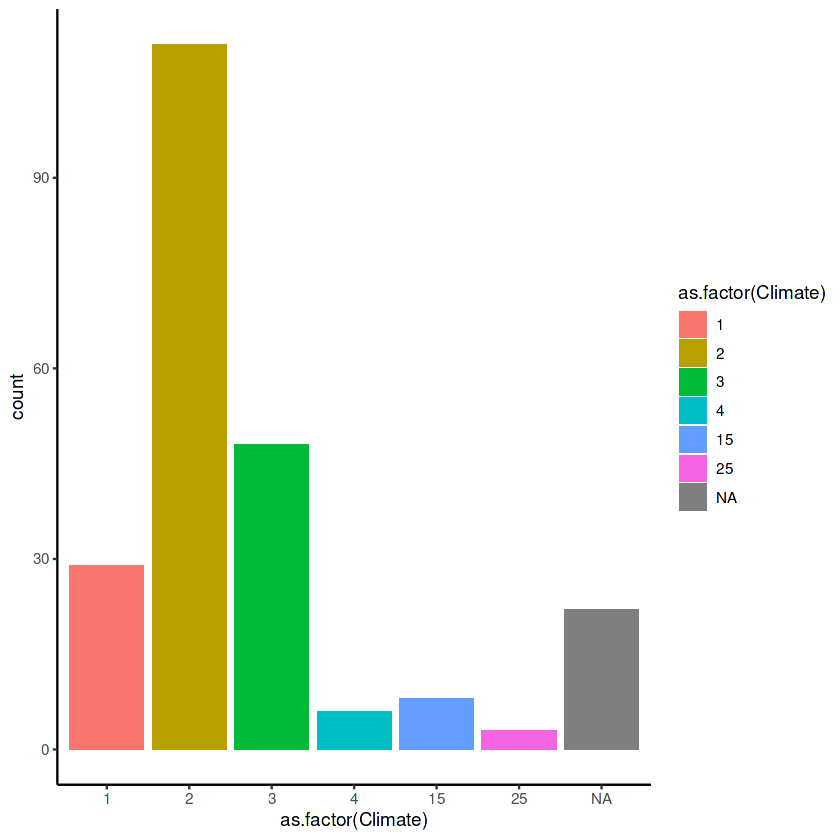

In [17]:
table(countries$Climate)
ggplot(data = countries) + geom_bar(aes(x = as.factor(Climate), fill = as.factor(Climate))) + theme_classic()

In [18]:
## Lets see some examples

In [19]:
countries %>% group_by(Climate) %>% slice_sample(n = 5) %>% select(Country, Region, Climate)

Country,Region,Climate
<chr>,<chr>,<dbl>
Turkmenistan,C.W. OF IND. STATES,1
Greenland,NORTHERN AMERICA,1
Qatar,NEAR EAST,1
Oman,NEAR EAST,1
Kuwait,NEAR EAST,1
Anguilla,LATIN AMER. & CARIB,2
"Bahamas, The",LATIN AMER. & CARIB,2
Mayotte,SUB-SAHARAN AFRICA,2
Burundi,SUB-SAHARAN AFRICA,2


In [20]:
countries %>% group_by(Region) %>% summarise(mean_climate = mean(Climate, na.rm = T)) %>% arrange(-mean_climate)

Region,mean_climate
<chr>,<dbl>
C.W. OF IND. STATES,4.800000
SUB-SAHARAN AFRICA,3.479167
ASIA (EX. NEAR EAST),3.296296
EASTERN EUROPE,3.111111
WESTERN EUROPE,3.095238
BALTICS,3.000000
LATIN AMER. & CARIB,2.933333
NORTHERN AMERICA,2.000000
OCEANIA,2.000000


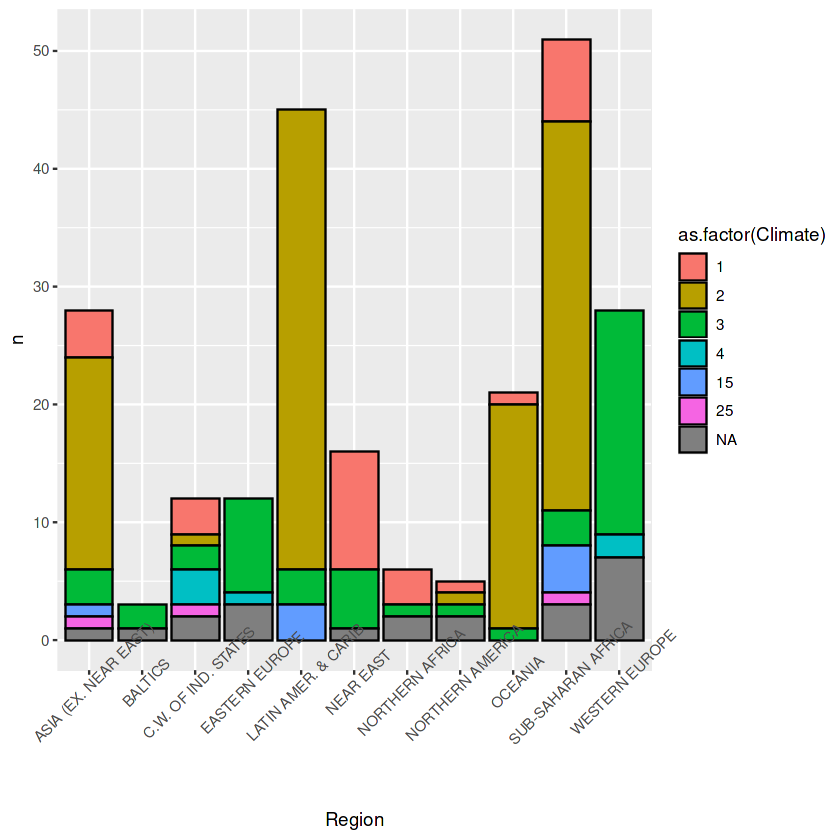

In [21]:
countries %>% group_by(Region, Climate) %>% count() %>% ggplot() + geom_col(aes(x = Region, y = n, fill = as.factor(Climate)),
                                                                           position = 'stack', color = 'black') + theme(axis.text.x = element_text(angle = 45))

In [22]:
countries %>% group_by(Region) %>% summarise(total_na = sum(is.na(Climate))) %>% arrange(-total_na)

Region,total_na
<chr>,<int>
WESTERN EUROPE,7
EASTERN EUROPE,3
SUB-SAHARAN AFRICA,3
C.W. OF IND. STATES,2
NORTHERN AFRICA,2
NORTHERN AMERICA,2
ASIA (EX. NEAR EAST),1
BALTICS,1
NEAR EAST,1


## Missing data analysis

In [23]:
library(naniar)

In [24]:
missing_df <- (miss_var_summary(countries))
print(missing_df)

# A tibble: 20 × 3
   variable         n_miss pct_miss
   <chr>             <int>    <dbl>
 1 Climate              22    9.69 
 2 Literacy             18    7.93 
 3 Industry             16    7.05 
 4 Agriculture          15    6.61 
 5 Service              15    6.61 
 6 Phones                4    1.76 
 7 Deathrate             4    1.76 
 8 Net_migration         3    1.32 
 9 Infant_mortality      3    1.32 
10 Birthrate             3    1.32 
11 Arable                2    0.881
12 Crops                 2    0.881
13 Other                 2    0.881
14 GDP                   1    0.441
15 Country               0    0    
16 Region                0    0    
17 Population            0    0    
18 Area                  0    0    
19 Pop_density           0    0    
20 Coastline             0    0    


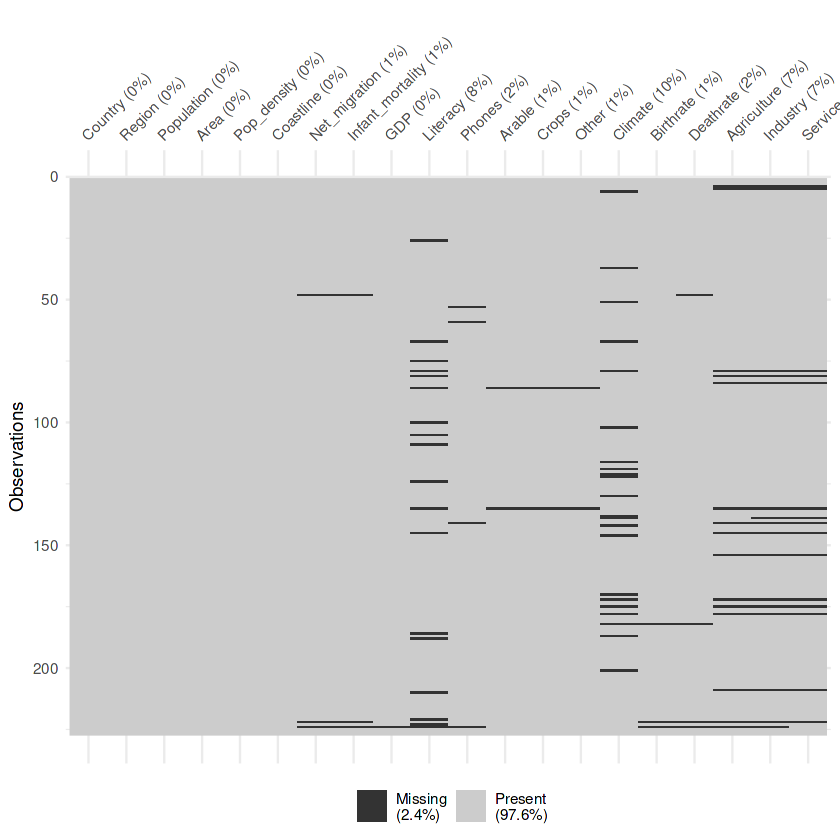

In [25]:
vis_miss(countries)

We decide to use mean-imputation by imputing in the region's mean for the respective missing entries. 

In [26]:
columns_with_NA <- missing_df[missing_df$n_miss >0,]$variable

print(columns_with_NA)

 [1] "Climate"          "Literacy"         "Industry"         "Agriculture"     
 [5] "Service"          "Phones"           "Deathrate"        "Net_migration"   
 [9] "Infant_mortality" "Birthrate"        "Arable"           "Crops"           
[13] "Other"            "GDP"             


In [27]:
countries <- countries %>%
  group_by(Region) %>%
  mutate(across(all_of(columns_with_NA), ## Apply to multiple columns
                ~replace_na(.x, mean(.x, na.rm = TRUE))  ## define the function that we want to apply on the columns. (.x represents a column )
                )) %>% ungroup()

In [28]:
## Check that imputation has been successful
numeric_cols_bool <- sapply(countries, is.numeric)
sapply(countries[numeric_cols_bool], mean)

Population             Area      Pop_density        Coastline 
    2.874028e+07     5.982270e+05     3.790471e+03     2.116533e+03 
   Net_migration Infant_mortality              GDP         Literacy 
    1.045170e+01     3.149682e+03     9.671189e+03     8.338750e+02 
          Phones           Arable            Crops            Other 
    2.352151e+03     1.163067e+03     4.124124e+02     6.811860e+03 
         Climate        Birthrate        Deathrate      Agriculture 
    2.995597e+00     2.038440e+03     8.157324e+02     1.059327e+02 
        Industry          Service 
    2.170403e+02     4.121566e+02

In [29]:
sapply(countries, function(col){sum(is.na(col))})

Country           Region       Population             Area 
               0                0                0                0 
     Pop_density        Coastline    Net_migration Infant_mortality 
               0                0                0                0 
             GDP         Literacy           Phones           Arable 
               0                0                0                0 
           Crops            Other          Climate        Birthrate 
               0                0                0                0 
       Deathrate      Agriculture         Industry          Service 
               0                0                0                0

# Modelling using GAMs

Following my previous analysis on this same dataset using regression methods via Python, we saw that not all bivariate relationships between GDP 
predictors were linear, namely for agriculture, child mortality, etc. This is also possibly due to the fact that the relationships were negative, yet GDP has a lower limit of 0, hence GDP cannot keep going down at a constant rate and understandably, the drop as the predictors increase will slow down.

Hence, we use Generalised Additive Models. These allow for some predictors to be specified as non-linear and the algorithm then finds a suitable smoothing function for said predictors. 

In order to iteratively visualise each predictor against GDP, we first transform our **wide** data format to **long**. This allows us to have one new column which contains the name of the predictor, and another column that just contains value. 

In [30]:
numeric_cols <- colnames(countries)[numeric_cols_bool]

## Change to long format -- let GDP repeat itself, since we want it to be one column. The other columns merge together
long_countries <- countries %>% select(GDP, all_of(numeric_cols)) %>% pivot_longer(cols = -GDP, names_to = 'variable', values_to= 'value')

## See
head(long_countries)

GDP,variable,value
<int>,<chr>,<dbl>
700,Population,31056997
700,Area,647500
700,Pop_density,480
700,Coastline,0
700,Net_migration,2306
700,Infant_mortality,16307


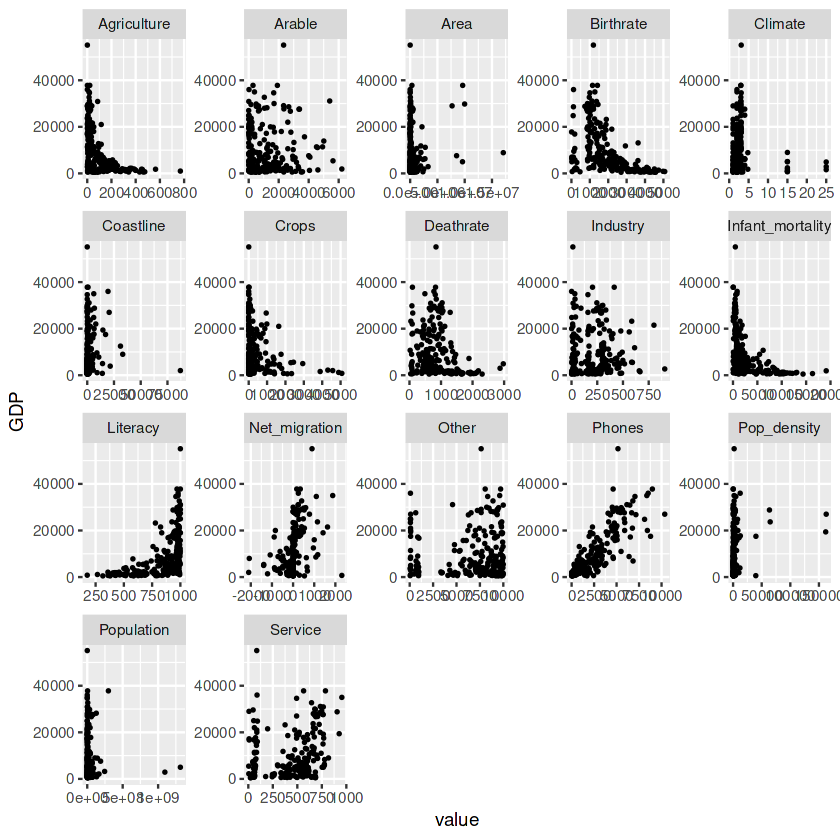

In [31]:
## Plot
ggplot(long_countries) + geom_point(aes(x = value, y= GDP), size = .5) +
facet_wrap(~variable, scales = 'free') ## 

There are some plots where we can see some obvious outliers in terms of the value of the predictors. For example, Coastline has one datapoint that is much larger than the rest, and Population has 2, same for Pop_density. Rather than remove them, we can attempt to use the log transformation for those variables

In [32]:
## Cols with anomalies
cols_to_log <- c("Population", "Pop_density", "Area", "Coastline", "Climate")

## Apply log across all
countries_with_log <- countries %>% mutate(across(all_of(cols_to_log), log1p))

In [33]:
head(countries_with_log[cols_to_log])
head(countries[cols_to_log]) ## 

Population,Pop_density,Area,Coastline,Climate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.25133,6.175867,13.380876,0.000000,0.6931472
15.09134,7.128496,10.266358,4.844187,1.3862944
17.30990,4.934474,14.683342,1.609438,0.6931472
10.96466,7.974189,5.298317,8.670772,1.0986123
11.17328,7.327781,6.150603,0.000000,1.3862944
16.31095,4.584967,14.036011,2.639057,1.4994370


Population,Pop_density,Area,Coastline,Climate
<int>,<dbl>,<int>,<dbl>,<dbl>
31056997,480,647500,0,1.000000
3581655,1246,28748,126,3.000000
32930091,138,2381740,4,1.000000
57794,2904,199,5829,2.000000
71201,1521,468,0,3.000000
12127071,97,1246700,13,3.479167


In [34]:
## Change the names of the variables that have been log to {variable_logged}
new_log_names <- paste0(colnames(countries_with_log[cols_to_log]), '_logged')
names(countries_with_log)[names(countries_with_log) %in% cols_to_log] <- new_log_names
colnames(countries_with_log)

[1] "Country"            "Region"             "Population_logged" 
 [4] "Pop_density_logged" "Area_logged"        "Coastline_logged"  
 [7] "Net_migration"      "Infant_mortality"   "GDP"               
[10] "Literacy"           "Phones"             "Arable"            
[13] "Crops"              "Other"              "Climate_logged"    
[16] "Birthrate"          "Deathrate"          "Agriculture"       
[19] "Industry"           "Service"

Now, we repeat the plots for the new dataset with logged predictors

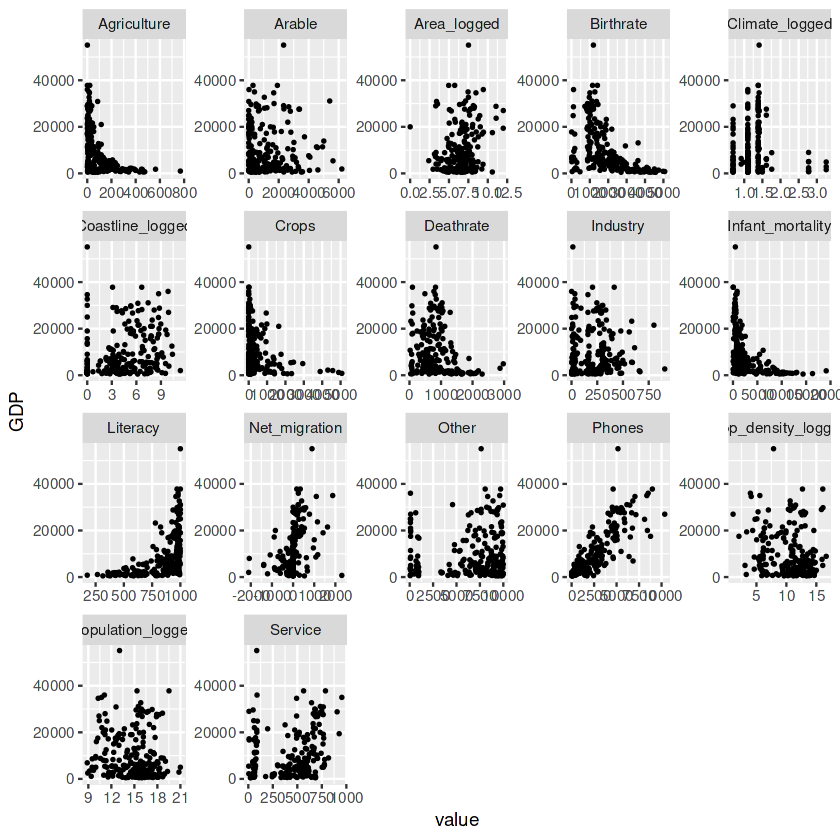

In [35]:
numeric_cols_2 <- colnames(countries_with_log[numeric_cols_bool])

long_countries_2 <- countries_with_log %>% select(GDP, all_of(numeric_cols_2)) %>% pivot_longer(cols = -GDP, names_to = 'variable', values_to= 'value')

ggplot(long_countries_2) + geom_point(aes(x = value, y= GDP), size = .5) +
facet_wrap(~variable, scales = 'free') ## 

There is also one single outlier for GDP, which is Luxembourg, as we have seen in our previous analysis. Let us simply remove it.

In [36]:
countries_with_log_without_anomaly <- countries_with_log[countries_with_log$Country != 'Luxembourg',]

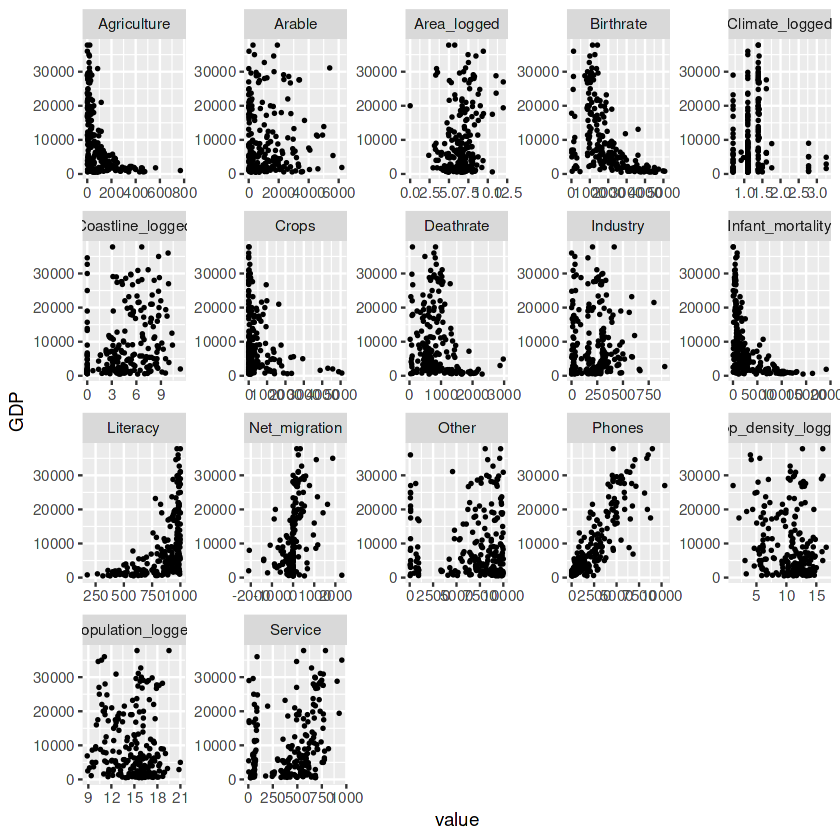

In [37]:
long_countries_3 <- countries_with_log_without_anomaly %>% select(GDP, all_of(numeric_cols_2)) %>% pivot_longer(cols = -GDP, names_to = 'variable', values_to= 'value')

ggplot(long_countries_3) + geom_point(aes(x = value, y= GDP), size = .5) +
facet_wrap(~variable, scales = 'free') ## 

The predictors that look linear with respect to GDP are:
* Area
* Climate
* Phones

Hence we will specify this when fitting the GAM. For the rest, we will allow smoothing functions

In [38]:
colnames(countries_with_log_without_anomaly)

[1] "Country"            "Region"             "Population_logged" 
 [4] "Pop_density_logged" "Area_logged"        "Coastline_logged"  
 [7] "Net_migration"      "Infant_mortality"   "GDP"               
[10] "Literacy"           "Phones"             "Arable"            
[13] "Crops"              "Other"              "Climate_logged"    
[16] "Birthrate"          "Deathrate"          "Agriculture"       
[19] "Industry"           "Service"

One predictor that we have not explored is Region, as it is factorial. Let us see the distribution of GDP across regions

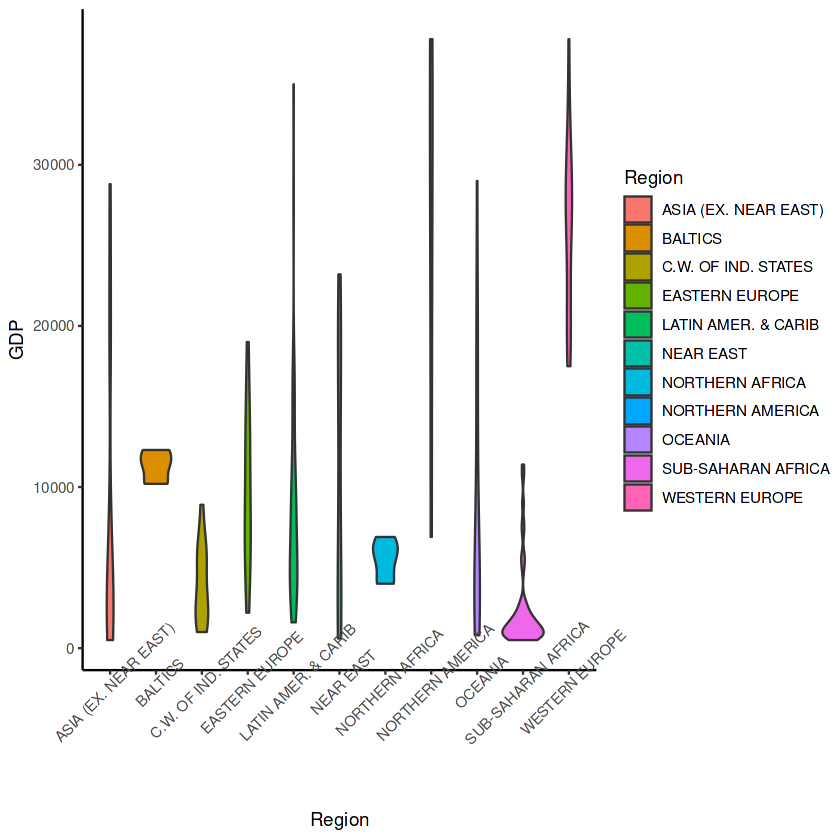

In [39]:
ggplot(countries_with_log_without_anomaly) + geom_violin(aes(x = Region, y = GDP, fill = Region)) +
theme_classic() +
theme(axis.text.x = element_text(angle = 45))

### Fitting the GAM

In [40]:
library(gam)

Loading required package: splines

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loaded gam 1.22-2




In [41]:
## Fit the GAM
GAM_model <- gam(GDP ~ Region +
                     s(Population_logged) +
                     s(Pop_density_logged) +
                     Area_logged + 
                     Coastline_logged +
                     Net_migration +
                     s(Infant_mortality) +
                     Literacy +
                     s(Phones) +
                     s(Arable) +
                     s(Crops) +
                     s(Other) +
                     Climate_logged +
                     s(Birthrate) +
                     s(Deathrate) +
                     s(Agriculture) +
                     s(Industry) +
                     s(Service),
             data = countries_with_log_without_anomaly)


## Interpreting the results 

In [42]:
summary(GAM_model)


Call: gam(formula = GDP ~ Region + s(Population_logged) + s(Pop_density_logged) + 
    Area_logged + Coastline_logged + Net_migration + s(Infant_mortality) + 
    Literacy + s(Phones) + s(Arable) + s(Crops) + s(Other) + 
    Climate_logged + s(Birthrate) + s(Deathrate) + s(Agriculture) + 
    s(Industry) + s(Service), data = countries_with_log_without_anomaly)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-11953.76  -1558.25     68.43   1853.73   9859.91 

(Dispersion Parameter for gaussian family taken to be 12667408)

    Null Deviance: 20666570593 on 225 degrees of freedom
Residual Deviance: 2052117004 on 161.9998 degrees of freedom
AIC: 4392.243 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                       Df     Sum Sq    Mean Sq  F value    Pr(>F)    
Region                 10 1.1388e+10 1138776256  89.8981 < 2.2e-16 ***
s(Population_logged)    1 5.4789e+06    5478931   0.4325 0.5116875    
s(Pop_density_logged)   1 2.413

## Results

### ANOVA for parametric effects

These results are significance levels of the pre-defined predictors and splines of non-linear predictors. We see the significant predictors include:

* Region 
* s(Pop_dens_logged)
* Coastline_logged
* Net_migration
* Phones 

etc. 

### ANOVA for nonparametric effects

These results test for the extent of non-linearity of the predictors. A high p value suggests that the predictor could be modelled linearly without the need for a spline. As we see here, Only population logged and phones are significantly non-linear, with agriculture and service to a weaker extent, but not the rest of the splines. 

### Visualise some splines

Warning message in gplot.default(x = c("ASIA (EX. NEAR EAST)", "EASTERN EUROPE", :
“The "x" component of "partial for Region" has class "character"; no gplot() methods available”


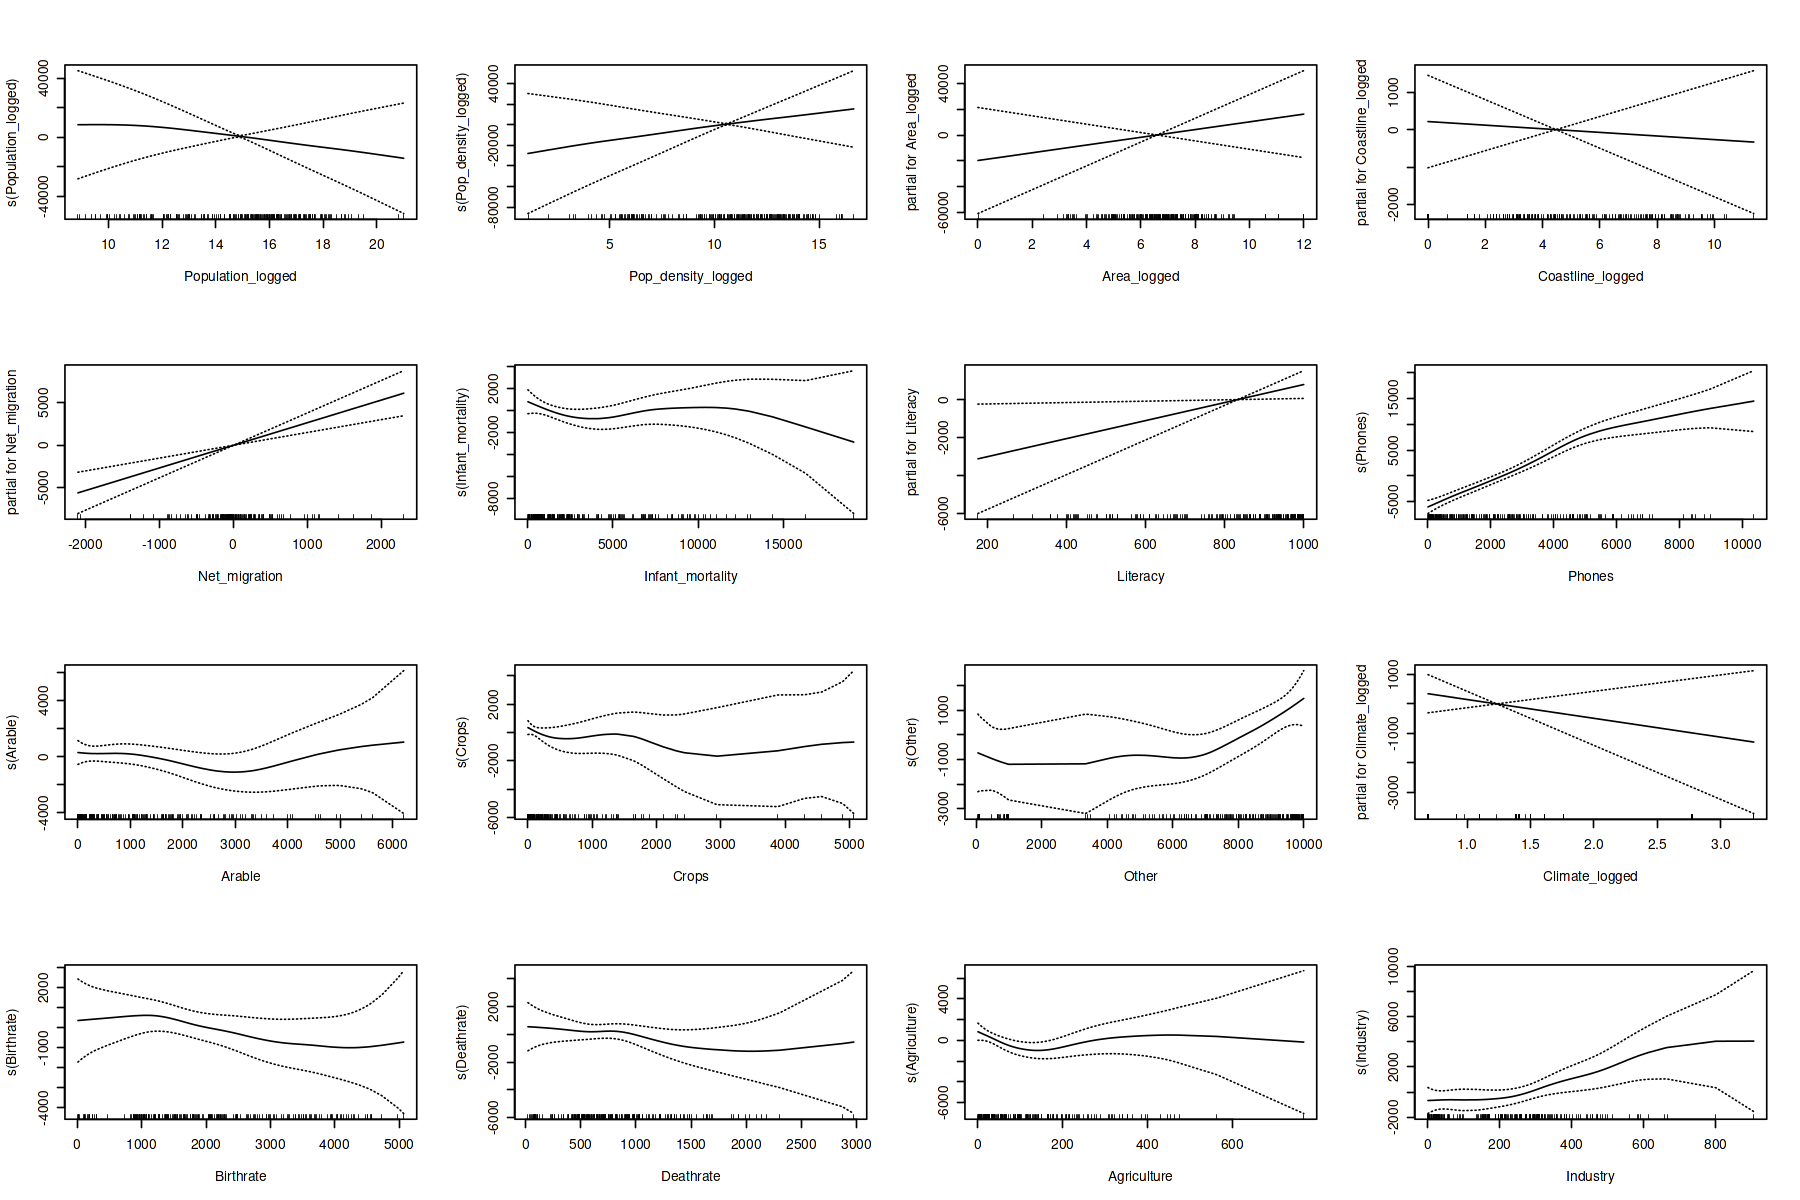

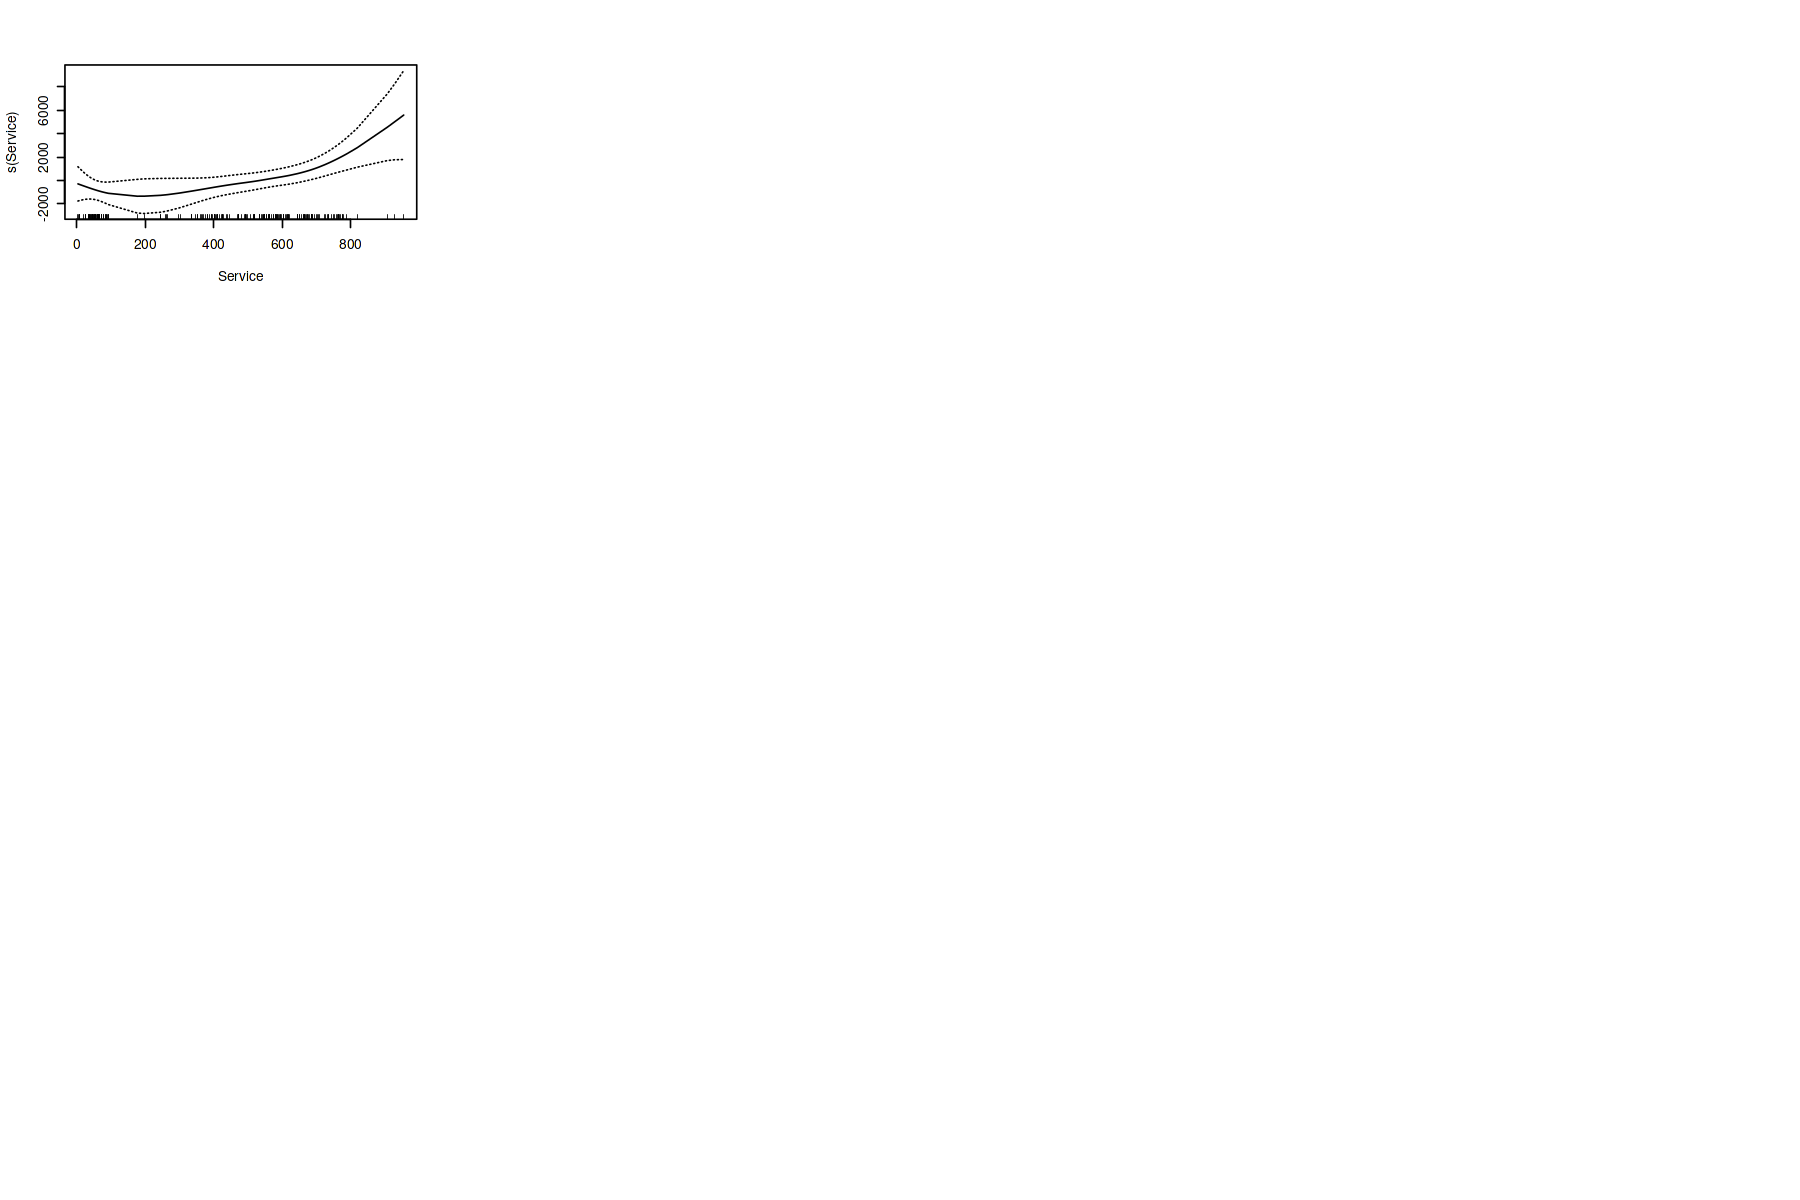

In [43]:
options(repr.plot.width=15, repr.plot.height=10)  # Adjust the dimensions as needed

par(mfrow = c(4,4))
plot(GAM_model, se = TRUE)

## Refit the GAM, but removing splines for non-significant non-parametric predictors 

In [44]:
GAM_model_2 <- gam(GDP ~ Region +
                     s(Population_logged) +
                     Pop_density_logged +
                     Area_logged + 
                     Coastline_logged +
                     Net_migration +
                     Infant_mortality +
                     Literacy +
                     s(Phones) +
                     Arable +
                     Crops +
                     Other +
                     Climate_logged +
                     Birthrate +
                     Deathrate +
                     s(Agriculture) +
                     Industry +
                     s(Service),
             data = countries_with_log_without_anomaly)


In [45]:
## See results 
summary(GAM_model_2)


Call: gam(formula = GDP ~ Region + s(Population_logged) + Pop_density_logged + 
    Area_logged + Coastline_logged + Net_migration + Infant_mortality + 
    Literacy + s(Phones) + Arable + Crops + Other + Climate_logged + 
    Birthrate + Deathrate + s(Agriculture) + Industry + s(Service), 
    data = countries_with_log_without_anomaly)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-12126.0  -1769.5    161.5   1925.2  10918.8 

(Dispersion Parameter for gaussian family taken to be 12475260)

    Null Deviance: 20666570593 on 225 degrees of freedom
Residual Deviance: 2320404017 on 186.0004 degrees of freedom
AIC: 4372.01 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                      Df     Sum Sq    Mean Sq  F value    Pr(>F)    
Region                10 1.1603e+10 1160259462  93.0048 < 2.2e-16 ***
s(Population_logged)   1 9.3204e+05     932044   0.0747  0.784900    
Pop_density_logged     1 1.3835e+08  138346095  11.0896  0.001047 ** 

## Fully linear regression (benchmark model)

It is of interest to include a fully linear, parsimonious model that can provide a benchmark for comparison of the GAM models. It could tell us if non-linearity is required at all. 

In [46]:
linear_model <- lm(data = countries_with_log_without_anomaly, GDP~.-Country)

In [47]:
## Check summary 
summary(linear_model)


Call:
lm(formula = GDP ~ . - Country, data = countries_with_log_without_anomaly)

Residuals:
     Min       1Q   Median       3Q      Max 
-15247.7  -2319.4    188.5   2298.1  12554.0 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.522e+04  1.004e+04  -1.515   0.1313    
RegionBALTICS              9.714e+02  2.670e+03   0.364   0.7164    
RegionC.W. OF IND. STATES -3.448e+03  1.584e+03  -2.177   0.0307 *  
RegionEASTERN EUROPE      -1.086e+03  1.614e+03  -0.672   0.5021    
RegionLATIN AMER. & CARIB -4.455e+02  1.159e+03  -0.384   0.7012    
RegionNEAR EAST            6.193e+02  1.404e+03   0.441   0.6597    
RegionNORTHERN AFRICA      2.070e+02  1.954e+03   0.106   0.9157    
RegionNORTHERN AMERICA     4.774e+03  2.534e+03   1.884   0.0611 .  
RegionOCEANIA              3.403e+03  1.504e+03   2.264   0.0247 *  
RegionSUB-SAHARAN AFRICA   1.713e+03  1.265e+03   1.354   0.1772    
RegionWESTERN EUROPE       6.334e+03  1.

## Compare GAM and GAM_2

1. Compare nested models via likelihood ratio tests

In [48]:
## Between both GAM models -- GAM_model_2 is nested since it is less complex
anova(GAM_model_2, GAM_model, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,186.0004,2320404017,NA,NA,NA
2,161.9998,2052117004,24.0007,268287012,0.6281651


Results: The result of the chi squared test suggests that the added complexity of the first model (i.e. the added splines for predictors, such as logged population density, infant mortality, etc) are not justified. This is despite the fact that the visualisations, e.g. for infant mortality, seem to suggest non-linearity.

Possible explanation: the visualisation of non-conditional bivariate non-linearity between some predictors and the outcome, such as infant mortality, may not capture the predictor's dependence on the other predictors that have been included in the multiple regression. It could be possible that due to those other predictors, the non-linearities become insignificant. 

In [49]:
## Between full linear and GAMs 
anova(linear_model, GAM_model_2)
anova(linear_model, GAM_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,198.0000,3164181324,NA,NA,NA,NA
2,186.0004,2320404017,11.99955,843777307,5.636548,3.169088e-08


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,198.0000,3164181324,NA,NA,NA,NA
2,161.9998,2052117004,36.00025,1112064320,2.438578,8.060492e-05


Results: In both cases, the non-linearity is highly justified by the small p values 

2. BIC/ AIC 

In [50]:
AIC(GAM_model); AIC(GAM_model_2); AIC(linear_model)

[1] 4392.243

[1] 4372.01

[1] 4418.106

In [51]:
BIC(GAM_model); BIC(GAM_model_2); BIC(linear_model)

[1] 4491.438

[1] 4471.206

[1] 4517.301

In [52]:
model_comparison <- data.frame('Model' = c("GAM1", 'GAM2', 'Linear'), 
                             'AIC' = c(AIC(GAM_model), AIC(GAM_model_2), AIC(linear_model)),
                              'BIC' = c(BIC(GAM_model), BIC(GAM_model_2), BIC(linear_model)))

In [53]:
print(model_comparison)

   Model      AIC      BIC
1   GAM1 4392.243 4491.438
2   GAM2 4372.010 4471.206
3 Linear 4418.106 4517.301


In [54]:
library(reshape2)

model_comparison_long <- melt(model_comparison, id.vars = "Model", 
                              variable.name = "Metric", ## new name for original column (categorical)
                              value.name = "Value") ## new name for numeric entries
## Check
print(model_comparison_long)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




   Model Metric    Value
1   GAM1    AIC 4392.243
2   GAM2    AIC 4372.010
3 Linear    AIC 4418.106
4   GAM1    BIC 4491.438
5   GAM2    BIC 4471.206
6 Linear    BIC 4517.301


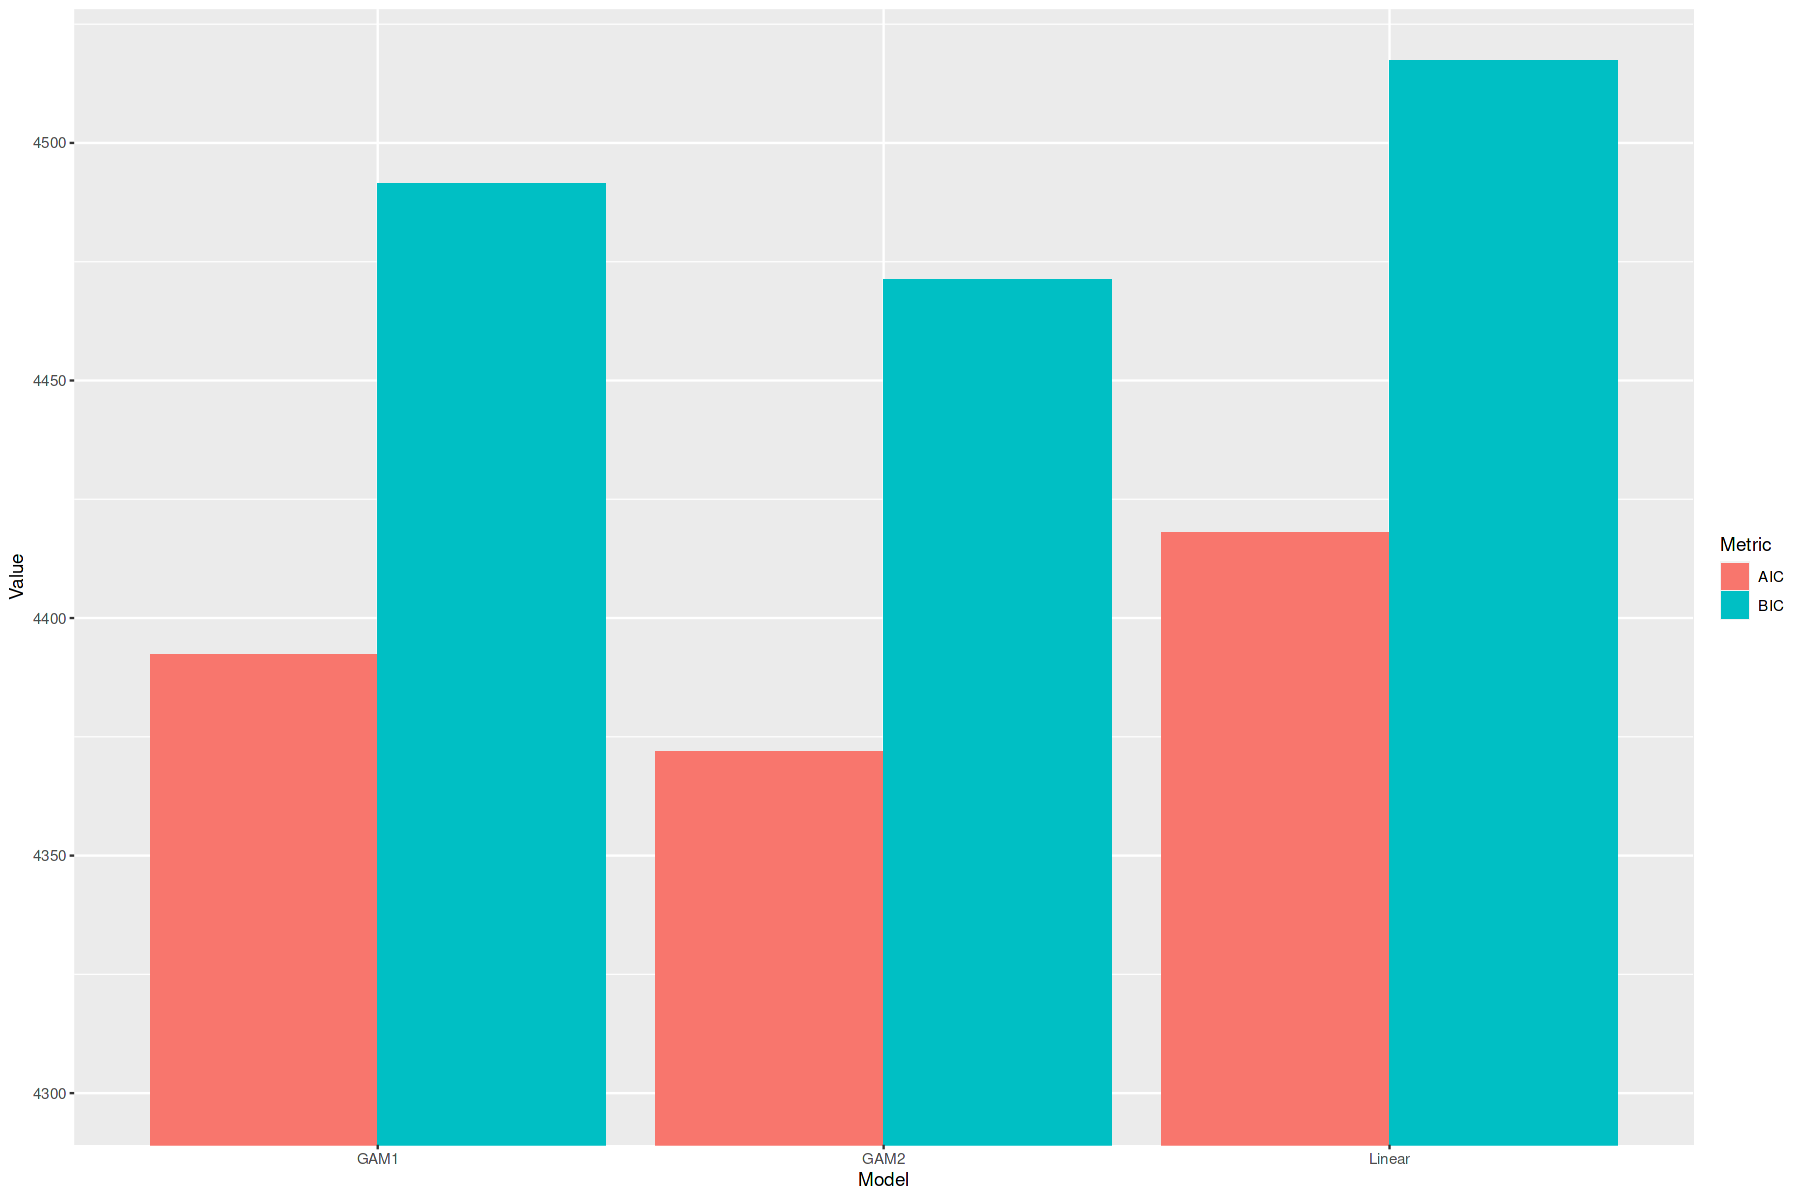

In [55]:
ggplot(data = model_comparison_long, aes(x = Model, y = Value, fill = Metric)) +geom_bar(stat = 'identity', ## we already have the numbers, dont need geom_bar to do counting for us (i.e. histogram style -- stat = 'count')
                                                                                         position = 'dodge') +
    coord_cartesian(ylim = c(4300, max(model_comparison_long$Value)))


Results: A nice compromise between having no linear effects and having too many non-linear effects via splines produces the best outcome in GAM_Model_2, where both AIC and BIC are the lowest, albeit not by much. 

3. Comparing residuals 

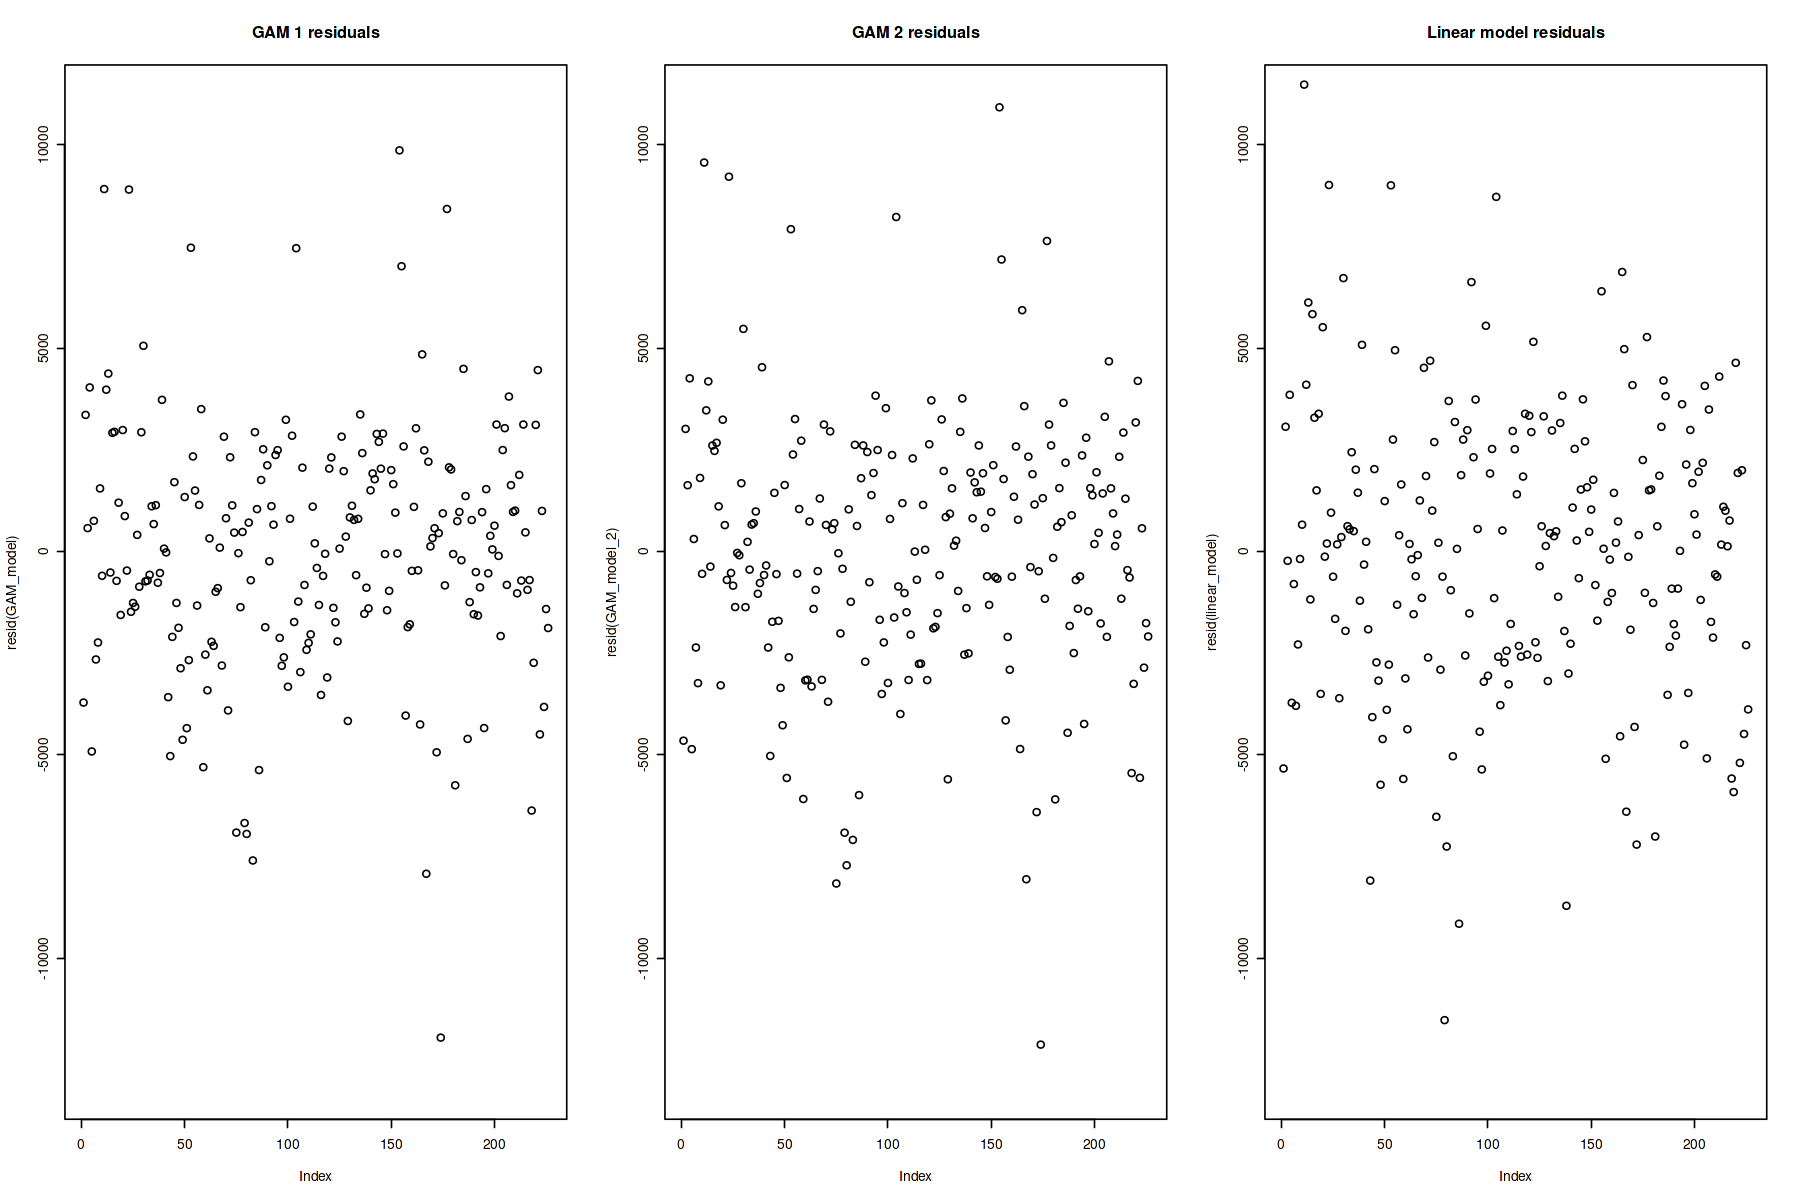

In [56]:
par(mfrow = c(1,3))
plot(resid(GAM_model), ylim = c(-13000, 11000), main = 'GAM 1 residuals')
plot(resid(GAM_model_2), ylim = c(-13000, 11000), main = 'GAM 2 residuals')
plot(resid(linear_model), ylim = c(-13000, 11000), main = 'Linear model residuals')

Across all three models, the residuals look scattered around 0 with no clear pattern, which is a good sign. However, in all 3 plots we see one point lying in the negative region below -10000. 

## Find residual 'outlier'

In [57]:
## Find the index for the point that is less than -10k (residual)
which(resid(linear_model) < -10000);which(resid(GAM_model)< -10000);which(resid(GAM_model_2)< -10000)

## Save index 
resid_outlier <- which(resid(GAM_model_2)< -10000)

79 174 
 79 174

174 
174

174 
174

In [58]:
## Find the datapoint 
countries_with_log_without_anomaly[resid_outlier,]

Country,Region,Population_logged,Pop_density_logged,Area_logged,Coastline_logged,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate_logged,Birthrate,Deathrate,Agriculture,Industry,Service
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
St Pierre & Miquelon,NORTHERN AMERICA,8.857515,5.493061,5.673323,8.509161,-486,754,6900,990,6832,1304,0,8696,1.098612,1352,683,8,166.3333,520
